In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

from yahoo_fin.stock_info import get_data


In [23]:

#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split


In [24]:
DG_df= get_data("DG", start_date="12/04/2010", end_date="12/04/2022", index_as_date = False, interval="1d")
DG_df

,date,open,high,low,close,adjclose,volume,ticker
0,2010-12-06,31.920000,32.000000,30.580000,30.990000,28.657188,4422300,DG
1,2010-12-07,31.510000,31.799999,31.280001,31.600000,29.221264,2586000,DG
2,2010-12-08,31.490000,31.700001,30.700001,30.840000,28.518475,1819000,DG
3,2010-12-09,31.010000,31.510000,30.770000,30.830000,28.509237,11532700,DG
4,2010-12-10,30.830000,31.340000,30.830000,31.070000,28.731163,1460800,DG
...,...,...,...,...,...,...,...,...
2945,2022-08-18,256.260010,258.320007,254.830002,257.660004,257.660004,1342800,DG
2946,2022-08-19,256.739990,256.869995,252.720001,253.860001,253.860001,1576200,DG
2947,2022-08-22,253.630005,253.630005,248.119995,248.729996,248.729996,1822100,DG
2948,2022-08-23,249.059998,249.440002,245.619995,247.600006,247.600006,1669300,DG


In [25]:
DG_df = DG_df.drop("ticker", axis=1)

In [26]:
DG_df.to_csv("DG_df.csv", index=False)

In [27]:
DG_df = pd.read_csv('DG_df.csv')

In [28]:
DG_df

,date,open,high,low,close,adjclose,volume
0,2010-12-06,31.920000,32.000000,30.580000,30.990000,28.657188,4422300
1,2010-12-07,31.510000,31.799999,31.280001,31.600000,29.221264,2586000
2,2010-12-08,31.490000,31.700001,30.700001,30.840000,28.518475,1819000
3,2010-12-09,31.010000,31.510000,30.770000,30.830000,28.509237,11532700
4,2010-12-10,30.830000,31.340000,30.830000,31.070000,28.731163,1460800
...,...,...,...,...,...,...,...
2945,2022-08-18,256.260010,258.320007,254.830002,257.660004,257.660004,1342800
2946,2022-08-19,256.739990,256.869995,252.720001,253.860001,253.860001,1576200
2947,2022-08-22,253.630005,253.630005,248.119995,248.729996,248.729996,1822100
2948,2022-08-23,249.059998,249.440002,245.619995,247.600006,247.600006,1669300


In [29]:
#print the summary 
print(DG_df.describe())

              open         high          low        close     adjclose  \
count  2950.000000  2950.000000  2950.000000  2950.000000  2950.000000   
mean    103.484346   104.541176   102.463417   103.522454   100.043144   
std      63.286581    63.966438    62.653737    63.316729    64.019880   
min      26.760000    27.030001    26.650000    26.850000    24.828831   
25%      56.065001    56.632501    55.560001    56.245001    52.011086   
50%      76.024998    76.560001    75.230000    76.005001    71.732964   
75%     150.682495   154.749996   148.070004   152.045006   149.031841   
max     260.000000   262.209991   256.970001   259.040009   258.459534   

             volume  
count  2.950000e+03  
mean   2.885375e+06  
std    2.694768e+06  
min    3.044000e+05  
25%    1.639825e+06  
50%    2.289550e+06  
75%    3.337250e+06  
max    6.613720e+07  


In [30]:
#now prep the data for 2014-2019
DG_df.set_index(pd.DatetimeIndex(DG_df['date']), inplace=True)

In [31]:
#Keep the close for 2014-19
DG_df = DG_df[['close']]

In [32]:
print(DG_df)

                 close
date                  
2010-12-06   30.990000
2010-12-07   31.600000
2010-12-08   30.840000
2010-12-09   30.830000
2010-12-10   31.070000
...                ...
2022-08-18  257.660004
2022-08-19  253.860001
2022-08-22  248.729996
2022-08-23  247.600006
2022-08-24  247.449997

[2950 rows x 1 columns]


In [33]:
print (DG_df.index.max())

2022-08-24 00:00:00


In [34]:
DG_df

,close
date,
2010-12-06,30.990000
2010-12-07,31.600000
2010-12-08,30.840000
2010-12-09,30.830000
2010-12-10,31.070000
...,...
2022-08-18,257.660004
2022-08-19,253.860001
2022-08-22,248.729996


In [35]:
DG_dataset = DG_df.values

In [36]:
DG_dataset

array([[ 30.98999977],
       [ 31.60000038],
       [ 30.84000015],
       ...,
       [248.72999573],
       [247.6000061 ],
       [247.44999695]])

In [37]:
#data_14_22 = XRT_df.filter(['Close'])
#dataset_14_22 = data_14_22.values
DG_data = DG_df.filter(['close'])
DG_dataset = DG_data.values
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(dataset_14_22)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(DG_df)


training_data_len =math.ceil(len(DG_df) *.7)
train_data =scaled_data[0:training_data_len , : ]


X_train_data = []
y_train_data = []

for i in range(1500,len(train_data)):
    X_train_data=list(X_train_data)
    y_train_data=list(y_train_data)
    X_train_data.append(train_data[i-1500:i,0])
    y_train_data.append(train_data[i,0])

    X_train_data1, y_train_data1 = np.array(X_train_data), np.array(y_train_data)
    
    X_train_data2 = np.reshape(X_train_data1,(X_train_data1.shape[0],X_train_data1.shape[1],1))

   
    
#1500 = number of days you can change it accordingly. 

# There will be a total of 60 values, 1st column will contain an index of 0-59
# The second will have an index of 1-60 ++_
# the y_train has the 60 st value on c1 and c2 will have 61++

In [38]:
#Lets build the LSTM MODEL 

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_data2.shape[1],1)))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))

model.add(Dense(units=1))


#okay this example will have 2 LSTM layers w/50 neurons and 2 dense layers
# plust one with 25 nuerons 

In [39]:
# Complete the model 

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_data2, y_train_data1, batch_size=1, epochs=1)

565/565 [==============================] - 195s 341ms/step - loss: 0.0012


In [45]:
test_data = scaled_data[training_data_len -1500: , : ]

X_test = []

y_test = DG_dataset[training_data_len : , : ]

for i in range(1500,len(test_data)):
    
    X_test.append(test_data[i-1500:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)

28/28 [==============================] - 5s 195ms/step


In [46]:
# Error calculation where RMSE = root mean squared error 

rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [47]:
print(rmse)

11.418712953179693


In [43]:
#OOOF okay the lower the value is to 0 the better
# it indicates that the models p-value match the actual values from the data set 
# which in this case it does not. 

c:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


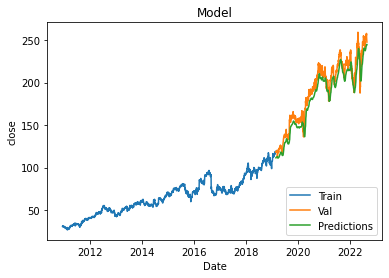

In [49]:
#Predict and visualize 

train = DG_df[:training_data_len]

valid = DG_df[training_data_len:]

valid['Predictions'] = predictions

plt.title('Model')

plt.xlabel('Date')

plt.ylabel('close')

plt.plot(train['close'])

plt.plot(valid[['close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [ ]:
DG_dataset.plot()

In [ ]:
train['close']

In [ ]:
valid[['close', 'Predictions']]

In [ ]:
complete_DG_df = pd.concat([train[['close']], valid[['Close', 'Predictions']]])
complete_DG_df